**Title : Machine Learning Models for Detecting Water Quality Issues and Their Impact on Health.**

**Category:** Medical Science (Category 7)

** Objective:**
The objective is to analyze the impact of water quality on public health by identifying correlations between contaminated water and the prevalence of waterborne diseases.

**Summary:**  Ensuring clean and safe water is essential for public health and environmental sustainability. Traditional methods of water quality assessment are often time-consuming and rely heavily on manual analysis, which lacks efficiency and precision. This project leverages machine learning techniques to analyze and predict water quality based on environmental and chemical parameters.

The study employs Logistic Regression, Random Forest, Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Gradient Boosting to build predictive models. The performance of these models is evaluated using key metrics such as accuracy, precision, recall, and F1-score.

The results show that **Random Forest** and **SVM** are the most effective models for water quality prediction, both achieving **69% accuracy**. These models offer superior predictive power and robustness, making them ideal for analyzing environmental and chemical data.  This contributes to safer water resources, better public health, and environmental sustainability.



**Data Source URL:** ( https://www.kaggle.com/code/berkemk/water-quality-eda)


# Import liabrary


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier


# Data Read

In [ ]:
# dataset read

dt=pd.read_csv("/content/water_quality.csv")

# Data Analysis

In [ ]:
# show the dataset

dt.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
# dataset shape (row and column)

dt.shape

(3276, 10)

In [ ]:
# data information

dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
#  check data columns

dt.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
# data describe

dt.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
# features correlation

dt.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


# Data Preposseing

In [ ]:
# missing value check

dt.isnull()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,True,False,False,True,False,False
3273,False,False,False,False,True,False,False,False,False,False
3274,False,False,False,False,True,False,False,False,False,False


In [ ]:
# missing value count

dt.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [ ]:
#import liabray to show missing value

import missingno as msno

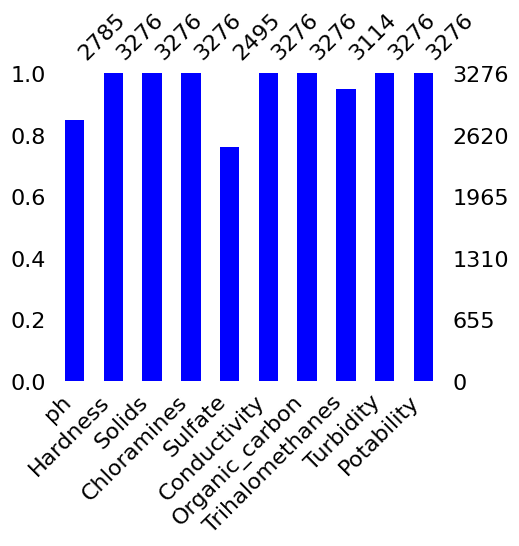

In [ ]:
#visualize the missing value

msno.bar(dt, figsize = (5,4),color = "blue")
plt.show()

In [ ]:
# chech duplicated value

dt.duplicated().sum()

0

In [ ]:
# If we removing the missing value then use the dropna

#dt.dropna (inplace=True)
#dt.isnull().sum()

In [ ]:
# Filling the missing  value

filled = dt.fillna({
    'ph': dt['ph'].mean(),
    'Sulfate': dt['Sulfate'].mean(),
    'Trihalomethanes': dt['Trihalomethanes'].mean()
}, inplace=True)

In [ ]:
# After replace the missing value then count the dataset

dt.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


# Data Visualization

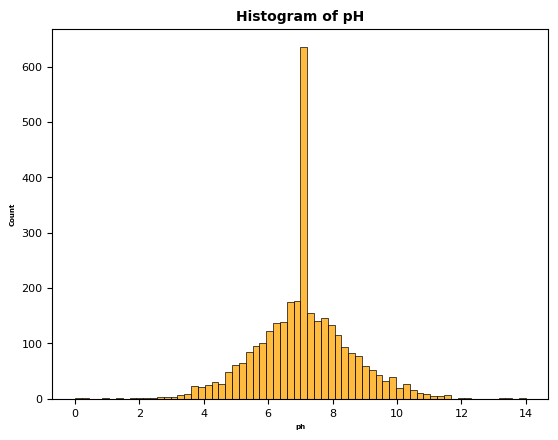

In [ ]:
# Histogram plot for the distribution of the ratio of pH

plt.figure()
plt.subplot(1,1,1)
sns.histplot(dt['ph'],color = 'orange')
plt.title('Histogram of pH', fontsize=10, fontweight='bold')
plt.xlabel('ph',fontsize = 5, fontweight='bold')
plt.ylabel('Count', fontsize = 5, fontweight='bold')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

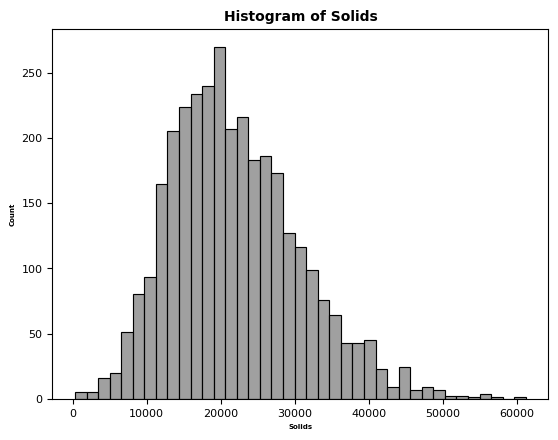

In [ ]:
# Histogram plot for the distribution of the ratio of pH

plt.figure()
plt.subplot(1,1,1)
sns.histplot(dt['Solids'],color = 'gray')
plt.title('Histogram of Solids', fontsize=10, fontweight='bold')
plt.xlabel('Solids',fontsize = 5, fontweight='bold')
plt.ylabel('Count', fontsize = 5, fontweight='bold')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

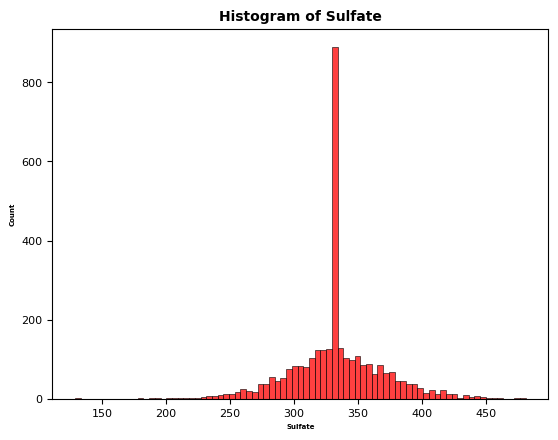

In [ ]:
# Histogram plot for the distribution of the ratio of pH

plt.figure()
plt.subplot(1,1,1)
sns.histplot(dt['Sulfate'],color = 'red')
plt.title('Histogram of Sulfate', fontsize=10, fontweight='bold')
plt.xlabel('Sulfate',fontsize = 5, fontweight='bold')
plt.ylabel('Count', fontsize = 5, fontweight='bold')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

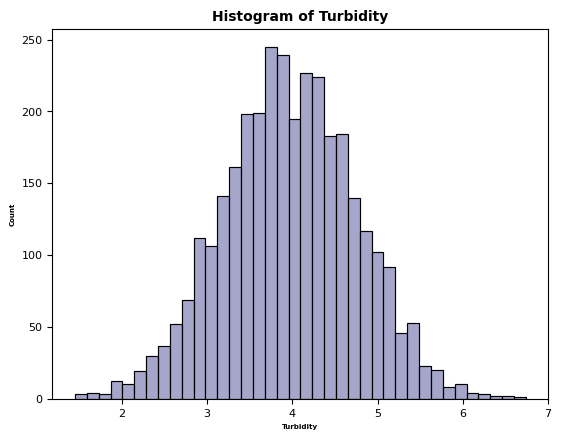

In [ ]:
# Histogram plot for the distribution of the ratio of pH

plt.figure()
plt.subplot(1,1,1)
sns.histplot(dt['Turbidity'],color = '#8989ba')
plt.title('Histogram of Turbidity', fontsize=10, fontweight='bold')
plt.xlabel('Turbidity',fontsize = 5, fontweight='bold')
plt.ylabel('Count', fontsize = 5, fontweight='bold')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

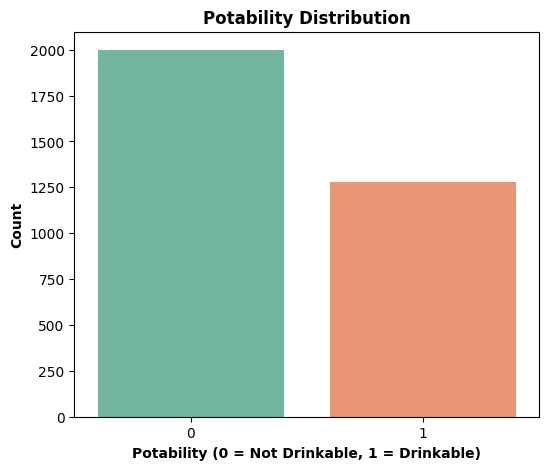

In [ ]:
# Check for potability column
if 'Potability' in dt.columns:
    # Countplot for Potability
    plt.figure(figsize=(6, 5))
    sns.countplot(x='Potability', data=dt, palette='Set2')

    plt.title('Potability Distribution', fontsize=12, fontweight='bold')
    plt.xlabel('Potability (0 = Not Drinkable, 1 = Drinkable)', fontsize=10, fontweight='bold')
    plt.ylabel('Count', fontsize=10, fontweight='bold')

    plt.show()
else:
    print("No 'Potability' column found in the dataset.")

# Outlier Remove

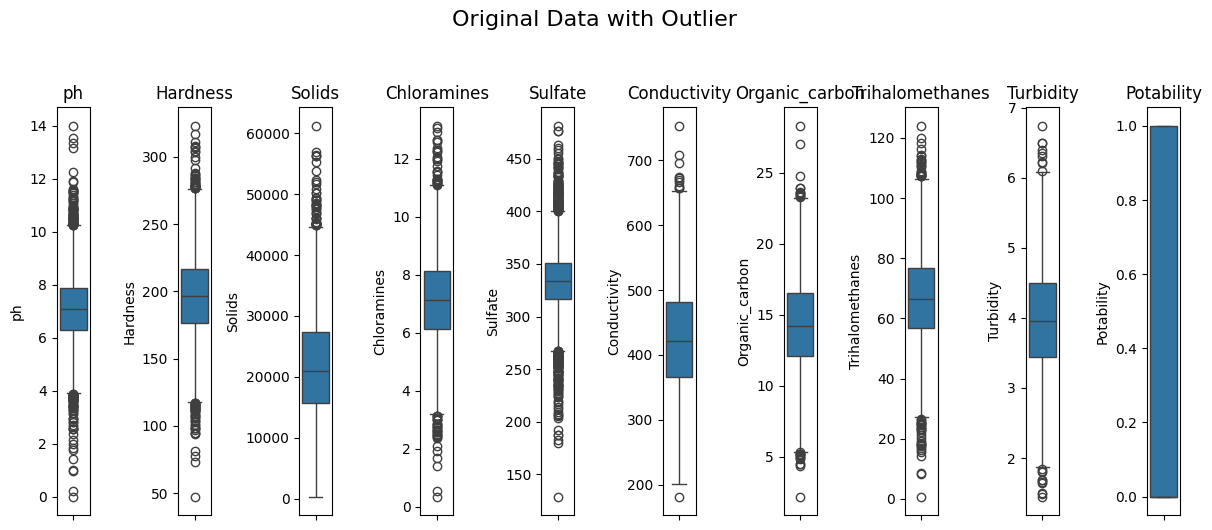

In [ ]:
# Selecting only numerical columns for outlier detection
numerical_cols = dt.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(1, len(numerical_cols), figsize=(12, 5))
fig.suptitle('Original Data with Outlier', fontsize=16, y=1.05)

# Plot boxplot for original data (with outliers)
for i, col in enumerate(numerical_cols):
    sns.boxplot(ax=axes[i], data=dt, y=col)
    axes[i].set_title(f'{col}')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to ensure the titles and plots are not overlapping
plt.tight_layout()

plt.show()


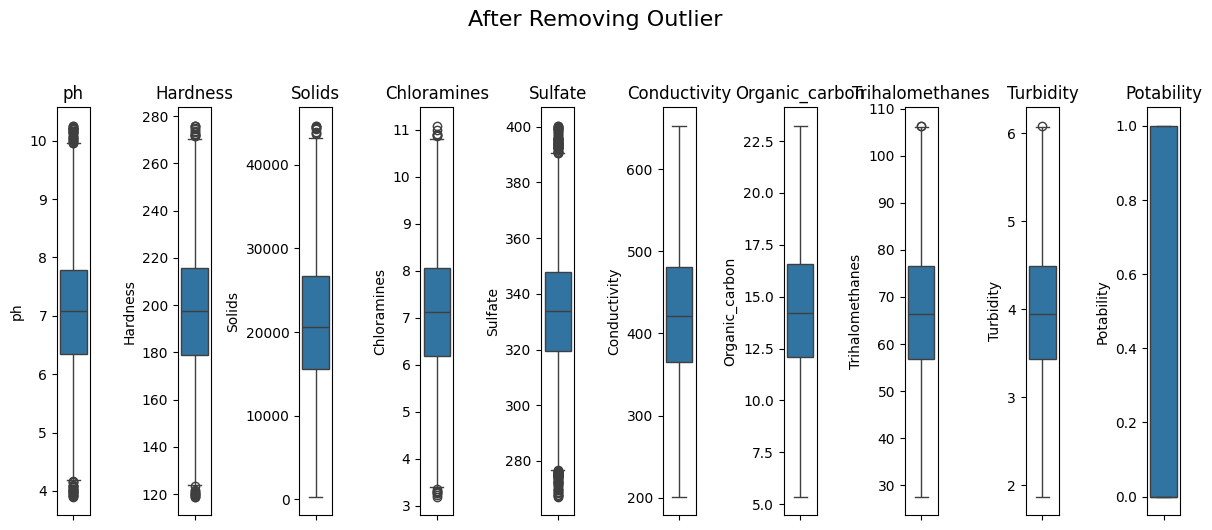

In [ ]:
# Selecting only numerical columns for outlier detection
numerical_cols = dt.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(1, len(numerical_cols), figsize=(12, 5))
fig.suptitle('After Removing Outlier', fontsize=16, y=1.05)


# Calculate IQR to remove outliers (as we did before)
Q1 = dt[numerical_cols].quantile(0.25)
Q3 = dt[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing the outliers
outliers_condition = (dt[numerical_cols] < lower_bound) | (dt[numerical_cols] > upper_bound)
dt_cleaned = dt[~outliers_condition.any(axis=1)]

# Plot boxplot for cleaned data (after removing outliers)
for i, col in enumerate(numerical_cols):
    sns.boxplot(ax=axes[ i], data=dt_cleaned, y=col)
    axes[ i].set_title(f'{col}')
    axes[ i].tick_params(axis='x', rotation=45)



# Adjust layout to ensure the titles and plots are not overlapping
plt.tight_layout()

plt.show()

# Correlation Matrix

In [ ]:
# 'Potability' column will show the relationship values ​​of other columns
correlation = dt.corr()
print(correlation['Potability'].sort_values(ascending = False),'\n')

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.006960
Turbidity          0.001581
ph                -0.003287
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.020619
Organic_carbon    -0.030001
Name: Potability, dtype: float64 



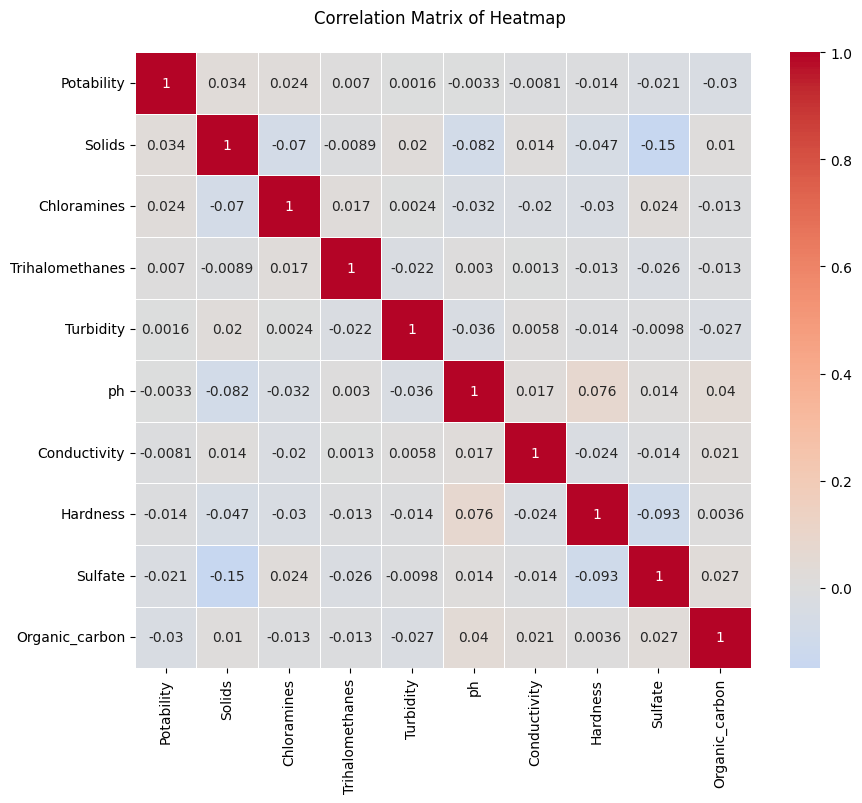

In [ ]:
# Calculate the correlation matrix for all columns
correlation = dt.corr()

# Select the top columns based on correlation with 'Potability'
sorted_columns = sorted_corr.index

# Extract the correlation matrix for the sorted columns
cm = correlation.loc[sorted_columns, sorted_columns]

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='coolwarm', linewidths=0.5, square=True, annot_kws={'size': 10}, center=0)

plt.title('Correlation Matrix of Heatmap \n')
plt.show()


# Data scalling and trainning

In [ ]:
# Split the data
X = dt.drop('Potability', axis=1)
y = dt['Potability']


In [ ]:
# train test initial
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building and Analysis

In [ ]:
# Train Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict and evaluate
lr_predictions = lr_model.predict(X_test_scaled)
print("Logistic Regression Results:")
print(classification_report(y_test, lr_predictions))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       617
           1       1.00      0.00      0.01       366

    accuracy                           0.63       983
   macro avg       0.81      0.50      0.39       983
weighted avg       0.77      0.63      0.49       983



In [ ]:
# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict and evaluate
rf_predictions = rf_model.predict(X_test_scaled)
print("Random Forest Results:")
print(classification_report(y_test, rf_predictions))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.70      0.89      0.78       617
           1       0.65      0.36      0.46       366

    accuracy                           0.69       983
   macro avg       0.67      0.62      0.62       983
weighted avg       0.68      0.69      0.66       983



In [ ]:
from sklearn.svm import SVC

# Train SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predict and evaluate
svm_predictions = svm_model.predict(X_test_scaled)
print("SVM Results:")
print(classification_report(y_test, svm_predictions))

SVM Results:
              precision    recall  f1-score   support

           0       0.69      0.93      0.79       617
           1       0.71      0.30      0.42       366

    accuracy                           0.69       983
   macro avg       0.70      0.61      0.61       983
weighted avg       0.70      0.69      0.65       983



In [ ]:
# Train Random Forest
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

# Predict and evaluate
knn_predictions = knn_model.predict(X_test_scaled)
print("Knn Results:")
print(classification_report(y_test, knn_predictions))

Knn Results:
              precision    recall  f1-score   support

           0       0.68      0.77      0.72       617
           1       0.50      0.39      0.44       366

    accuracy                           0.63       983
   macro avg       0.59      0.58      0.58       983
weighted avg       0.61      0.63      0.62       983



In [ ]:
# Train Gradient Boosting
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict and evaluate
xgb_predictions = xgb_model.predict(X_test_scaled)
print("Gradient Boosting Results:")
print(classification_report(y_test, xgb_predictions))

Gradient Boosting Results:
              precision    recall  f1-score   support

           0       0.70      0.80      0.75       617
           1       0.56      0.43      0.48       366

    accuracy                           0.66       983
   macro avg       0.63      0.61      0.62       983
weighted avg       0.65      0.66      0.65       983



In [ ]:
from sklearn.metrics import accuracy_score

# Gather accuracy scores
models = ['Logistic Regression', 'Random Forest', 'SVM', 'K-Neighbors','Gradient Boosting']
accuracies = [
    accuracy_score(y_test, lr_predictions),
    accuracy_score(y_test, rf_predictions),
    accuracy_score(y_test, svm_predictions),
    accuracy_score(y_test, knn_predictions),
    accuracy_score(y_test, xgb_predictions),
]

# Display comparison
for model, acc in zip(models, accuracies):
    print(f"{model}: Accuracy = {acc:.2f}")

Logistic Regression: Accuracy = 0.63
Random Forest: Accuracy = 0.69
SVM: Accuracy = 0.69
K-Neighbors: Accuracy = 0.63
Gradient Boosting: Accuracy = 0.66


In [ ]:
comparison_table = pd.DataFrame({
    'Model': models,
    'Accuracy': [f"{acc:.2f}" for acc in accuracies]
})

# Display the table
comparison_table

,Model,Accuracy
0,Logistic Regression,0.63
1,Random Forest,0.69
2,SVM,0.69
3,K-Neighbors,0.63
4,Gradient Boosting,0.66


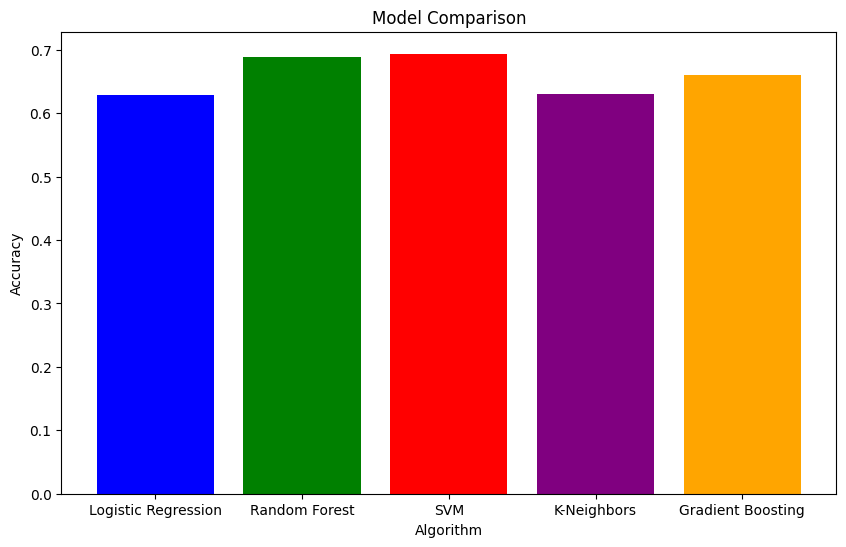

In [ ]:
plt.figure(figsize=(10, 6))

# Plot accuracies
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple','orange'])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()

In [ ]:
# now we predict the some demo data
data = np.array([[7, 400, 150, 220, 300, 28, 1,5,65]])

# Predictions for each model (replace with actual trained models)
predictions = {
    'Logistic Regression': lr_model.predict(data),
    'Random Forest': rf_model.predict(data),
    'Support Vector Machine': svm_model.predict(data),
    'K-Neighbors': knn_model.predict(data),
    'Gradient Boosting': xgb_model.predict(data),
}

# Accuracy list for each model (replace with actual accuracy values from your models)
accuracies = {
    'Logistic Regression': accuracies[0],
    'Random Forest': accuracies[1],
    'Support Vector Machine': accuracies[2],
    'K-Neighbors': accuracies[3],
    'Gradient Boosting': accuracies[4],
}

# Output predictions and accuracy for each model
for index, (model, prediction) in enumerate(predictions.items(), start=1):
    predicted_potability = "Drinkable" if prediction[0] == 1 else "Not Drinkable" # Assuming 1 means drinkable and 0 means not drinkable
    accuracy = round(accuracies[model] * 100, 2)
    model_name = f'{model} ({accuracy}%)'
    print(f'{index}. Prediction for water potability based on {model_name}: {predicted_potability}\n')






1. Prediction for water potability based on Logistic Regression (62.87%): Not Drinkable

2. Prediction for water potability based on Random Forest (68.87%): Not Drinkable

3. Prediction for water potability based on Support Vector Machine (69.38%): Drinkable

4. Prediction for water potability based on K-Neighbors (62.97%): Not Drinkable

5. Prediction for water potability based on Gradient Boosting (66.02%): Not Drinkable

